In [1]:
#IMPORTS#
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import random
import os

from library.sb_utils import save_file

In [2]:
#LOADING DATA#
first_orders_returned = pd.read_csv('C:/Users/Anthony/Springboard/CapstoneTwo/DataCSV/first_orders_returned.csv')
first_orders_returned.head()

,month,customer_type,order_id,customer_id,product_name,product_price,ordered_item_quantity,total_sales
0,2021-08-01,First-time,4018603262104,5534494163096,Starter Bundle,129.0,1,129.0
1,2021-08-01,First-time,4025962856600,5549262799000,Starter Bundle,129.0,1,129.0
2,2021-08-01,First-time,4012543082648,5521774248088,Starter Bundle,129.0,1,129.0
3,2021-08-01,First-time,4026733166744,5550079213720,Starter Bundle,129.0,1,129.0
4,2021-08-01,First-time,4028865904792,5552381329560,Starter Bundle,129.0,1,129.0


In [3]:
#LOADING DATA#
one_time_customers = pd.read_csv('C:/Users/Anthony/Springboard/CapstoneTwo/DataCSV/one_time_customers.csv')
one_time_customers.head()

,month,customer_type,order_id,customer_id,product_name,product_price,ordered_item_quantity,total_sales
0,2021-08-01,First-time,4015908978840,5529401295000,Lugol's 5%,77.0,1,69.3
1,2021-08-01,First-time,4022000189592,5540183769240,Starter Bundle,129.0,1,129.0
2,2021-08-01,First-time,4025683378328,5548934627480,Starter Bundle,129.0,1,129.0
3,2021-08-01,First-time,4030761304216,5553759125656,Starter Bundle,129.0,1,129.0
4,2021-08-01,First-time,4012686180504,5521966235800,Starter Bundle,129.0,1,116.1


In [4]:
#LOADING DATA#
returning_orders = pd.read_csv('C:/Users/Anthony/Springboard/CapstoneTwo/DataCSV/returning_orders.csv')
returning_orders.head()

,month,customer_type,order_id,customer_id,product_name,product_price,ordered_item_quantity,total_sales
0,2021-08-01,Returning,4029632807064,3153602216029,Thiodine,77.0,1,77.0
1,2021-08-01,Returning,4011709595800,4409343836312,Starter Bundle,129.0,1,129.0
2,2021-08-01,Returning,4013491159192,5171456508056,HaloDetox,77.0,1,77.0
3,2021-08-01,Returning,4003358441624,4121210192024,ThyroConvert,77.0,2,154.0
4,2021-08-01,Returning,3981316358296,4441217433752,Starter Bundle,129.0,1,129.0


In [5]:
#LOADING DATA#
returning_orders_merged = pd.read_csv('C:/Users/Anthony/Springboard/CapstoneTwo/DataCSV/returning_orders_merged.csv')
returning_orders_merged.head()

,month,customer_type,order_id,customer_id,product_name,product_price,ordered_item_quantity,total_sales
0,2021-08-01,First-time,4018603262104,5534494163096,Starter Bundle,129.0,1,129.0
1,2021-08-01,First-time,4025962856600,5549262799000,Starter Bundle,129.0,1,129.0
2,2021-08-01,First-time,4012543082648,5521774248088,Starter Bundle,129.0,1,129.0
3,2021-08-01,First-time,4026733166744,5550079213720,Starter Bundle,129.0,1,129.0
4,2021-08-01,First-time,4028865904792,5552381329560,Starter Bundle,129.0,1,129.0


In [6]:
#ID ALSO LIKE TO ADD A DATA SET AT THIS POINT THAT HAS ALL OF THE FIRST ORDERS OF ALL CUSTOMERS
first_orders = pd.concat([first_orders_returned, one_time_customers])
first_orders.head()

,month,customer_type,order_id,customer_id,product_name,product_price,ordered_item_quantity,total_sales
0,2021-08-01,First-time,4018603262104,5534494163096,Starter Bundle,129.0,1,129.0
1,2021-08-01,First-time,4025962856600,5549262799000,Starter Bundle,129.0,1,129.0
2,2021-08-01,First-time,4012543082648,5521774248088,Starter Bundle,129.0,1,129.0
3,2021-08-01,First-time,4026733166744,5550079213720,Starter Bundle,129.0,1,129.0
4,2021-08-01,First-time,4028865904792,5552381329560,Starter Bundle,129.0,1,129.0


In [7]:
#AT THIS POINT I NO LONGER NEED A COUPLE COLUMNS:
#I NO LONGER NEED THE MONTH COLUMN, SINCE I HAVE ALREADY KNOW WHICH ORDERS WERE PLACED FIRST
#I NO LONGER NEED THE ORDER ID COLUMN SINCE I HAD MADE USE OF IT DURING THE DATA WRANGLING PHASE
first_orders_returned = first_orders_returned.drop(['month', 'order_id'], axis=1)
one_time_customers = one_time_customers.drop(['month', 'order_id'], axis=1)
returning_orders = returning_orders.drop(['month', 'order_id'], axis=1)
returning_orders_merged = returning_orders_merged.drop(['month', 'order_id'], axis=1)
first_orders = first_orders.drop(['month', 'order_id'], axis=1)
print(first_orders_returned.columns, one_time_customers.columns, returning_orders.columns, returning_orders_merged.columns, first_orders.columns)

Index(['customer_type', 'customer_id', 'product_name', 'product_price',
       'ordered_item_quantity', 'total_sales'],
      dtype='object') Index(['customer_type', 'customer_id', 'product_name', 'product_price',
       'ordered_item_quantity', 'total_sales'],
      dtype='object') Index(['customer_type', 'customer_id', 'product_name', 'product_price',
       'ordered_item_quantity', 'total_sales'],
      dtype='object') Index(['customer_type', 'customer_id', 'product_name', 'product_price',
       'ordered_item_quantity', 'total_sales'],
      dtype='object') Index(['customer_type', 'customer_id', 'product_name', 'product_price',
       'ordered_item_quantity', 'total_sales'],
      dtype='object')


In [8]:
#HERE I WANT TO SEE OF ALL THE ORDERS OF PEOPLE WHO CAME BACK IN THEIR LIFETIME, HOW MANY WERE EACH PRODUCT
count_rom = returning_orders_merged[['product_name', 'customer_type']].groupby('product_name').count().sort_values('customer_type', ascending = False)
count_rom['percentage'] = (count_rom['customer_type'] / count_rom['customer_type'].sum()) * 100
count_rom.rename(columns = {'customer_type': 'count'}, inplace = True)
count_rom.head(6)

,count,percentage
product_name,,
Starter Bundle,1072,33.763780
Lugol's 5%,921,29.007874
ThyroConvert,689,21.700787
Thiodine,301,9.480315
HaloDetox,191,6.015748
Starter Bundle with Coaching,1,0.031496


Here, we can tell that out of all of the people who ordered more than one item in their lifetime with our company, about 1/3 of those total orders were the Starter Bundle. It is also notable in this circumstance that the Starter Bundle comes with ThyroConvert, Thiodine, and HaloDetox in it. 

In [9]:
#NOW I WANT TO SEE OF THE PEOPLE WHO CAME BACK, WHAT WAS THEIR FIRST PRODUCT
count_for = first_orders_returned[['product_name', 'customer_type']].groupby('product_name').count().sort_values('customer_type', ascending = False)
count_for['percentage'] = (count_for['customer_type'] / count_for['customer_type'].sum()) * 100
count_for.rename(columns = {'customer_type': 'count'}, inplace = True)
count_for.head(6)

,count,percentage
product_name,,
Starter Bundle,618,49.047619
Lugol's 5%,401,31.825397
Thiodine,101,8.015873
ThyroConvert,99,7.857143
HaloDetox,41,3.253968


In [10]:
#THIS TIME OF THE PEOPLE WHO WERE ONE AND DONE
count_otc = one_time_customers[['product_name', 'customer_type']].groupby('product_name').count().sort_values('customer_type', ascending = False)
count_otc['percentage'] = (count_otc['customer_type'] / count_otc['customer_type'].sum()) * 100
count_otc.rename(columns = {'customer_type': 'count'}, inplace = True)
count_otc.head(6)


,count,percentage
product_name,,
Starter Bundle,8064,72.394290
Lugol's 5%,2229,20.010773
ThyroConvert,392,3.519167
Thiodine,298,2.675285
HaloDetox,153,1.373552
Starter Bundle with Coaching,3,0.026932


In [11]:
#AND NOW IN TOTAL FOR ALL FIRST TIME CUSTOMERS
count_fo = first_orders[['product_name', 'customer_type']].groupby('product_name').count().sort_values('customer_type', ascending = False)
count_fo['percentage'] = (count_fo['customer_type'] / count_fo['customer_type'].sum()) * 100
count_fo.rename(columns = {'customer_type': 'count'}, inplace = True)
count_fo.head(6)

,count,percentage
product_name,,
Starter Bundle,8682,70.021776
Lugol's 5%,2630,21.211388
ThyroConvert,491,3.959997
Thiodine,399,3.218001
HaloDetox,194,1.564642
Starter Bundle with Coaching,3,0.024195


Here, we can see that the overall first order numbers are very similar to the one time customer numbers. Around 70% of people who only come to the store once buy the Starter Bundle, while for customers who did end up returning to the store that number is closer to 50%.

In [12]:
#HERE ID LIKE TO SEE WHAT PEOPLE ARE GETTING IN THEIR RETURNING ORDERS
count_ro = returning_orders[['product_name', 'customer_type']].groupby('product_name').count().sort_values('customer_type', ascending = False)
count_ro['percentage'] = (count_ro['customer_type'] / count_ro['customer_type'].sum()) * 100
count_ro.rename(columns = {'customer_type': 'count'}, inplace = True)
count_ro.head(6)

,count,percentage
product_name,,
ThyroConvert,590,30.809399
Lugol's 5%,520,27.154047
Starter Bundle,454,23.707572
Thiodine,200,10.443864
HaloDetox,150,7.832898
Starter Bundle with Coaching,1,0.052219


This is congruent with what I'd expected to see. Since ThyroConvert comes with 60 servings, and Thiodine and HaloDetox come with 90 and 80 servings respectively, it wouldn't be shocking to see someone refilling their ThyroConvert more often.

Now, I'd like to see how often a person would buy the Starter Bundle, and then come back for the ThyroConvert refill.

To do so, I will create a DataFrame called f_sb_temp, which will contain all orders where a person bought the Starter Bundle as their first product and ended up returning to the store, as well as what they bought in their second order and potentially beyond.

In [13]:
f_sb_temp = pd.concat([first_orders_returned[first_orders_returned['product_name'] == 'Starter Bundle'], returning_orders[returning_orders['customer_id'].isin(first_orders_returned[first_orders_returned['product_name'] == 'Starter Bundle']['customer_id'])]])
f_sb_temp.head()

,customer_type,customer_id,product_name,product_price,ordered_item_quantity,total_sales
0,First-time,5534494163096,Starter Bundle,129.0,1,129.0
1,First-time,5549262799000,Starter Bundle,129.0,1,129.0
2,First-time,5521774248088,Starter Bundle,129.0,1,129.0
3,First-time,5550079213720,Starter Bundle,129.0,1,129.0
4,First-time,5552381329560,Starter Bundle,129.0,1,129.0


In [14]:
f_sb_temp.shape

(1545, 6)

In [15]:
print((f_sb_temp[f_sb_temp['customer_type'] == 'Returning'].groupby('product_name').count().sort_values('customer_type', ascending = False) / f_sb_temp[f_sb_temp['customer_type'] == 'Returning'].groupby('product_name').count().sum()*100)['customer_type'])

product_name
ThyroConvert                    40.453074
Starter Bundle                  31.499461
Lugol's 5%                      14.670982
HaloDetox                        6.796117
Thiodine                         6.472492
Starter Bundle with Coaching     0.107875
Name: customer_type, dtype: float64


It's interesting to see here that a significant amount of people who originally purchased the Starter Bundle, which does not include the Lugol's 5%, purchased the Lugol's 5% when coming back. At the same time, however, a lot of people came back to get a refill on the ThyroConvert as expected. I'm also surprised by the amount of people who didnt refill their HaloDetox and Thiodine, and instead went and bought another Starter Bundle.

In [16]:
#FIRST, I WILL NEED ANOTHER DATAFRAME CALLED F_NSB TO INDICATE PEOPLE WHOSE FIRST ORDERS WERE NOT THE STARTER BUNDLE
f_nsb_temp = pd.concat([first_orders_returned[first_orders_returned['product_name'] != 'Starter Bundle'], returning_orders[returning_orders['customer_id'].isin(first_orders_returned[first_orders_returned['product_name'] != 'Starter Bundle']['customer_id'])]])
f_nsb_temp.head()

,customer_type,customer_id,product_name,product_price,ordered_item_quantity,total_sales
6,First-time,5517111623832,ThyroConvert,77.0,1,77.00
7,First-time,5506186379416,Lugol's 5%,77.0,1,65.45
9,First-time,5503092326552,Lugol's 5%,77.0,1,65.45
22,First-time,5551604924568,Thiodine,77.0,1,77.00
24,First-time,5538101526680,Lugol's 5%,77.0,3,99.00


In [17]:
f_nsb_temp.shape

(1643, 6)

In [18]:
print((f_nsb_temp[f_nsb_temp['customer_type'] == 'Returning'].groupby('product_name').count().sort_values('customer_type', ascending = False) / f_nsb_temp[f_nsb_temp['customer_type'] == 'Returning'].groupby('product_name').count().sum()*100)['customer_type'])

product_name
Lugol's 5%        38.361638
ThyroConvert      22.077922
Starter Bundle    16.483516
Thiodine          14.285714
HaloDetox          8.791209
Name: customer_type, dtype: float64


Here, we have a more even distribution across the 5 products, with surprisingly a higher rate of people purchasing the Thiodine and HaloDetox here than in this first DataFrame.

Now I'd like to do the same thing, except concatenating the first_orders and returning_orders DataFrames together so I can use all of the Data to find results

In [19]:
f_sb = pd.concat([first_orders[first_orders['product_name'] == 'Starter Bundle'], returning_orders[returning_orders['customer_id'].isin(first_orders[first_orders['product_name'] == 'Starter Bundle']['customer_id'])]])

In [20]:
f_nsb = pd.concat([first_orders[first_orders['product_name'] != 'Starter Bundle'], returning_orders[returning_orders['customer_id'].isin(first_orders[first_orders['product_name'] != 'Starter Bundle']['customer_id'])]])

Now, using these two DataFrames, I will see which generated total sales more efficiently: buying the Starter Bundle first, or buying a product that is not the Starter Bundle first. I will do this by grouping by customer id, getting the sum of sales, and finding the mean.

In [21]:
#CALCULATING AVERAGE TOTAL SALES NUMBERS FOR STARTER BUNDLE / NOT STARTER BUNDLE
fsb_mean = float(round(f_sb[['customer_id', 'total_sales']].groupby('customer_id').agg('sum').sort_values('total_sales', ascending = False).mean(), 2))

In [22]:
fnsb_mean = float(round(f_nsb[['customer_id', 'total_sales']].groupby('customer_id').agg('sum').sort_values('total_sales', ascending = False).mean(), 2))

In [23]:
print('The average lifetime value for a person who orders the Starter Bundle first is $' + str(fsb_mean) + ", and for a person who doesn't order the Starter Bundle first, it's $" + str(fnsb_mean) + '.')

The average lifetime value for a person who orders the Starter Bundle first is $153.35, and for a person who doesn't order the Starter Bundle first, it's $110.19.


Here, we can tell fairly clearly that people who buy the Starter Bundle as their first product spend on average ~$43 more than people who don't buy the starter bundle as their first product.

Now, I want to see the total value of a person whose first purchase was the Lugol's 5% since a large amount of those orders in the f_nsb DataFrame were Lugol's 5%.

In [24]:
#CALCULATING AVERAGE TOTAL SALES NUMBERS FOR LUGOL'S 5%
f_l_temp = pd.concat([first_orders_returned[first_orders_returned['product_name'] == "Lugol's 5%"], returning_orders[returning_orders['customer_id'].isin(first_orders_returned[first_orders_returned['product_name'] == "Lugol's 5%"]['customer_id'])]])
f_l_temp.head()

,customer_type,customer_id,product_name,product_price,ordered_item_quantity,total_sales
7,First-time,5506186379416,Lugol's 5%,77.0,1,65.45
9,First-time,5503092326552,Lugol's 5%,77.0,1,65.45
24,First-time,5538101526680,Lugol's 5%,77.0,3,99.00
35,First-time,5226208657560,Lugol's 5%,77.0,1,33.00
40,First-time,5258989076632,Lugol's 5%,77.0,1,33.00


In [25]:
f_l_temp.shape

(1157, 6)

In [26]:
print((f_l_temp[f_l_temp['customer_type'] == 'Returning'].groupby('product_name').count().sort_values('customer_type', ascending = False) / f_l_temp[f_l_temp['customer_type'] == 'Returning'].groupby('product_name').count().sum()*100)['customer_type'])

product_name
Lugol's 5%        46.164021
ThyroConvert      20.767196
Starter Bundle    17.857143
HaloDetox          8.994709
Thiodine           6.216931
Name: customer_type, dtype: float64


It is definitely worth noting that nearly half of the people who ordered Lugol's 5% with their first order bought that same product the next time around. Let's find that same mean lifetime value for if a person specifically orders Lugol's 5% on their first order.

In [27]:
f_l = pd.concat([first_orders[first_orders['product_name'] == "Lugol's 5%"], returning_orders[returning_orders['customer_id'].isin(first_orders[first_orders['product_name'] == "Lugol's 5%"]['customer_id'])]])

In [28]:
fl_mean = float(round(f_l[['customer_id', 'total_sales']].groupby('customer_id').agg('sum').sort_values('total_sales', ascending = False).mean(), 2))

In [29]:
print('When a person orders any product except for the Starter Bundle first, their lifetime value is $' + str(fnsb_mean) + ", however when they order the Lugol's 5% first, it's $" + str(fl_mean) + '.')

When a person orders any product except for the Starter Bundle first, their lifetime value is $110.19, however when they order the Lugol's 5% first, it's $98.0.


Interestingly enough, a person's lifetime value is significantly lower if they order the Lugol's 5% than if they order just any product besides the Starter Bundle. We still want to see how much a certain value would normally deviate from the mean.

In [30]:
#STANDARD DEVIATION OF THE 3 MOST RECENT DATABASES
fsb_std = float(round(f_sb[['customer_id', 'total_sales']].groupby('customer_id').agg('sum').sort_values('total_sales', ascending = False).std(), 2))

In [31]:
fnsb_std = float(round(f_nsb[['customer_id', 'total_sales']].groupby('customer_id').agg('sum').sort_values('total_sales', ascending = False).std(), 2))

In [32]:
fl_std = float(round(f_l[['customer_id', 'total_sales']].groupby('customer_id').agg('sum').sort_values('total_sales', ascending = False).std(), 2))

In [33]:
print("The standard deviations for a customer's first order being the Starter Bundle, anything but the Starter Bundle, and Lugol's 5% are $" + str(fsb_std) + ', $' + str(fnsb_std) + ', and $' + str(fl_std) + '.')

The standard deviations for a customer's first order being the Starter Bundle, anything but the Starter Bundle, and Lugol's 5% are $54.84, $101.3, and $94.67.


We even notice a much smaller standard deviation with people who ordered the Starter Bundle as their first item! Just to totally confirm our previous findings, I am going to find the same numbers, but this time I will only use the returning numbers since those are what build lifetime customer value.

In [34]:
fsbr_mean = float(round(f_sb[f_sb['customer_type'] == 'Returning'].loc[:, ['customer_id', 'total_sales']].groupby('customer_id').agg('sum').sort_values('total_sales', ascending = False).mean(), 2))

In [35]:
fnsbr_mean = float(round(f_nsb[f_nsb['customer_type'] == 'Returning'].loc[:, ['customer_id', 'total_sales']].groupby('customer_id').agg('sum').sort_values('total_sales', ascending = False).mean(), 2))

In [36]:
flr_mean = float(round(f_l[f_l['customer_type'] == 'Returning'].loc[:, ['customer_id', 'total_sales']].groupby('customer_id').agg('sum').sort_values('total_sales', ascending = False).mean(), 2))

In [37]:
fsbr_std = float(round(f_sb[f_sb['customer_type'] == 'Returning'].loc[:, ['customer_id', 'total_sales']].groupby('customer_id').agg('sum').sort_values('total_sales', ascending = False).std(), 2))

In [38]:
fnsbr_std = float(round(f_nsb[f_nsb['customer_type'] == 'Returning'].loc[:, ['customer_id', 'total_sales']].groupby('customer_id').agg('sum').sort_values('total_sales', ascending = False).std(), 2))

In [39]:
flr_std = float(round(f_l[f_l['customer_type'] == 'Returning'].loc[:, ['customer_id', 'total_sales']].groupby('customer_id').agg('sum').sort_values('total_sales', ascending = False).std(), 2))

In [40]:
print("The mean and standard deviation for customer's returning orders if they first order the Starter Bundle is $" + str(fsbr_mean) + ' and $' + str(fsbr_std) + '.')

The mean and standard deviation for customer's returning orders if they first order the Starter Bundle is $155.34 and $104.36.


In [41]:
print("The mean and standard deviation for customer's returning orders when they first order anything except for the Starter Bundle is $" + str(fnsbr_mean) + ' and $' + str(fnsbr_std) + '.')

The mean and standard deviation for customer's returning orders when they first order anything except for the Starter Bundle is $175.38 and $175.33.


In [42]:
print("The mean and standard deviation for customer's returning orders when they first order the Lugol's 5% is $" + str(flr_mean) + ' and $' + str(flr_std) + '.')

The mean and standard deviation for customer's returning orders when they first order the Lugol's 5% is $169.37 and $174.01.


Interestingly, a customer's returning orders tend to have a higher value if the customer doesn't start out with the Starter Bundle. This is a very very useful piece of information to keep in mind.

Now this data is helpful, but it would be even more helpful if we knew the same pieces of information for each person's first orders, since they could order multiple products or get a discount.

In [43]:
fsbf_mean = float(round(f_sb[f_sb['customer_type'] == 'First-time'].loc[:, ['customer_id', 'total_sales']].groupby('customer_id').agg('sum').sort_values('total_sales', ascending = False).mean(), 2))

In [44]:
fnsbf_mean = float(round(f_nsb[f_nsb['customer_type'] == 'First-time'].loc[:, ['customer_id', 'total_sales']].groupby('customer_id').agg('sum').sort_values('total_sales', ascending = False).mean(), 2))

In [45]:
flf_mean = float(round(f_l[f_l['customer_type'] == 'First-time'].loc[:, ['customer_id', 'total_sales']].groupby('customer_id').agg('sum').sort_values('total_sales', ascending = False).mean(), 2))

In [46]:
fsbf_std = float(round(f_sb[f_sb['customer_type'] == 'First-time'].loc[:, ['customer_id', 'total_sales']].groupby('customer_id').agg('sum').sort_values('total_sales', ascending = False).std(), 2))

In [47]:
fnsbf_std = float(round(f_nsb[f_nsb['customer_type'] == 'First-time'].loc[:, ['customer_id', 'total_sales']].groupby('customer_id').agg('sum').sort_values('total_sales', ascending = False).std(), 2))

In [48]:
flf_std = float(round(f_l[f_l['customer_type'] == 'First-time'].loc[:, ['customer_id', 'total_sales']].groupby('customer_id').agg('sum').sort_values('total_sales', ascending = False).std(), 2))

In [49]:
print("The mean and standard deviation for customer's first orders if they first order the Starter Bundle is $" + str(fsbf_mean) + ' and $' + str(fsbf_std) + '.')

The mean and standard deviation for customer's first orders if they first order the Starter Bundle is $142.3 and $28.41.


In [50]:
print("The mean and standard deviation for customer's first orders if they first order anything except for the Starter Bundle is $" + str(fnsbf_mean) + ' and $' + str(fnsbf_std) + '.')

The mean and standard deviation for customer's first orders if they first order anything except for the Starter Bundle is $81.2 and $28.2.


In [51]:
print("The mean and standard deviation for customer's first orders if they first order the Lugol's 5% is $" + str(flf_mean) + ' and $' + str(flf_std) + '.')

The mean and standard deviation for customer's first orders if they first order the Lugol's 5% is $72.08 and $24.34.


As we'd expect, people who purchase the Starter Bundle first have the highest first order average value. This is right along with what we'd think since the Starter Bundle costs a lot more than any of the other products.

One piece of information really stuck out to me above in the count_otc DataFrame, that being the drop off rate of people who first decide to order the Starter Bundle. This data that we were just working with was only showing us what happens when the customers do decide to come back. Now, we have to take into account how often customer are one-and-done with us.

Obviously, people who only place one order and don't come back have a smaller lifetime value. We would like to see if promoting the Starter Bundle more agressively is hurting our profits in the long term, given that the Starter Bundle has a very high drop off rate.

In [52]:
fo_sbn = count_fo.rename(columns = {'count': 'total_count', 'percentage': 'total_percentage'})
nsb_count = fo_sbn['total_count'].iloc[1:].sum()
fo_sbn = fo_sbn.drop(['Thiodine', 'ThyroConvert', 'HaloDetox', 'Starter Bundle with Coaching'], axis = 0)


In [53]:
df_temp = pd.DataFrame([[nsb_count, 0], ], columns=['total_count', 'total_percentage'], index=['Not Starter Bundle'])
fo_sbn = fo_sbn.append(df_temp)

In [54]:
fo_sbn.loc['Not Starter Bundle', 'total_percentage'] = nsb_count / (fo_sbn['total_count'].sum() - fo_sbn.loc["Lugol's 5%", 'total_count']) * 100

In [55]:
fo_sbn

,total_count,total_percentage
Starter Bundle,8682,70.021776
Lugol's 5%,2630,21.211388
Not Starter Bundle,3717,29.978224


Now to add a few columns to that to make it more useful.

In [56]:
#ADDING IN A CONVERSION RATE FOR HOW OFTEN THIS CUSTOMER COMES BACK
fsb_conv = count_for.loc['Starter Bundle', 'count'] / count_fo.loc['Starter Bundle', 'count']
fnsb_conv = count_for.iloc[1:, 0].sum() / count_fo.iloc[1:, 0].sum()
fl_conv = count_for.loc["Lugol's 5%", 'count'] / count_fo.loc["Lugol's 5%", 'count']
fo_sbn['conv_rate (pct)'] = [fsb_conv * 100, fl_conv * 100, fnsb_conv * 100]

In [57]:
#ADDING IN MY MEAN VALUE COLUMN
fo_sbn['mean_value ($)'] = [fsb_mean, fl_mean, fnsb_mean]
fo_sbn['mean_value ($)'] = fo_sbn['mean_value ($)'].astype(float)

In [58]:
#ADDING IN MY STANDARD DEVIATION COLUMN
fo_sbn['std_value ($)'] = [fsb_std, fl_std, fnsb_std]
fo_sbn['std_value ($)'] = fo_sbn['std_value ($)'].astype(float)

In [59]:
#ADDING IN MEAN AND STANDARD DEVIATION FOR SPECIFICALLY THE FIRST ORDER AND THE RETURNING ORDER
fo_sbn['fo_mean ($)'] = [fsbf_mean, flf_mean, fnsbf_mean]
fo_sbn['fo_std ($)'] = [fsbf_std, flf_std, fnsbf_std]
fo_sbn['ro_mean ($)'] = [fsbr_mean, flr_mean, fnsbr_mean]
fo_sbn['ro_std ($)'] = [fsbr_std, flr_std, fnsbr_std]
fo_sbn

,total_count,total_percentage,conv_rate (pct),mean_value ($),std_value ($),fo_mean ($),fo_std ($),ro_mean ($),ro_std ($)
Starter Bundle,8682,70.021776,7.118176,153.35,54.84,142.30,28.41,155.34,104.36
Lugol's 5%,2630,21.211388,15.247148,98.00,94.67,72.08,24.34,169.37,174.01
Not Starter Bundle,3717,29.978224,17.271994,110.19,101.30,81.20,28.20,175.38,175.33


With the data collected, we can see that while a person who starts their customer journey with the Starter Bundle will likely have a higher lifetime value than someone who doesn't, we have to keep in mind the scope of our data. Since our data has been collected over a 3 year span from June of 2019 to May of 2022, it's important to take into account that a person wouldn't have time to realize their true lifetime value in that short of a time. Specifically with the Lugol's 5% which has 300 servings per bottle, a person would have to use that product every day for nearly a year to even see a value larger than their initial purchase price.

Finally, I am going to create a DataFrame organized into Starter Bundle, Not Starter Bundle, and Lugol's 5% just like above. This DataFrame however will have each instance of what a person first orders, their first order value, their returning order value, their lifetime value, and their customer id. There will be repeating instance when a person orders Lugol's 5%, but that's okay. The Starter Bundle and Lugol's 5% make up for >91% of the first orders, so we will not be comparing Lugol's 5% to first orders that were not the Starter Bundle. 

In [60]:
f_sb2 = f_sb.groupby('customer_id').agg('sum')
f_nsb2 = f_nsb.groupby('customer_id').agg('sum')
f_l2 = f_l.groupby('customer_id').agg('sum')

In [61]:
f_sb2['type'] = 'sb'
f_nsb2['type'] = 'nsb'
f_l2['type'] = 'l5'

In [62]:
f_sb2 = f_sb2.drop(['product_price', 'ordered_item_quantity'], axis = 1)
f_nsb2 = f_nsb2.drop(['product_price', 'ordered_item_quantity'], axis = 1)
f_l2 = f_l2.drop(['product_price', 'ordered_item_quantity'], axis = 1)

In [63]:
df1 = f_sb[f_sb['customer_type'] == 'Returning'].loc[:, ['customer_id', 'total_sales']].groupby('customer_id').agg('sum').sort_values('total_sales', ascending = False)
df2 = f_nsb[f_nsb['customer_type'] == 'Returning'].loc[:, ['customer_id', 'total_sales']].groupby('customer_id').agg('sum').sort_values('total_sales', ascending = False)
df3 = f_l[f_l['customer_type'] == 'Returning'].loc[:, ['customer_id', 'total_sales']].groupby('customer_id').agg('sum').sort_values('total_sales', ascending = False)
df4 = f_sb[f_sb['customer_type'] == 'First-time'].loc[:, ['customer_id', 'total_sales']].groupby('customer_id').agg('sum').sort_values('total_sales', ascending = False)
df5 = f_nsb[f_nsb['customer_type'] == 'First-time'].loc[:, ['customer_id', 'total_sales']].groupby('customer_id').agg('sum').sort_values('total_sales', ascending = False)
df6 = f_l[f_l['customer_type'] == 'First-time'].loc[:, ['customer_id', 'total_sales']].groupby('customer_id').agg('sum').sort_values('total_sales', ascending = False)

In [64]:
df1 = df1.rename(columns = {'total_sales': 'returning_sales'})
df2 = df2.rename(columns = {'total_sales': 'returning_sales'})
df3 = df3.rename(columns = {'total_sales': 'returning_sales'})
df4 = df4.rename(columns = {'total_sales': 'first_sales'})
df5 = df5.rename(columns = {'total_sales': 'first_sales'})
df6 = df6.rename(columns = {'total_sales': 'first_sales'})
df = pd.concat([f_sb2, f_nsb2, f_l2])

In [65]:
df7 = pd.concat([df4, df5, df6])
df = df.join(df7, on = 'customer_id')
df8 = pd.concat([df1, df2, df3])
df = df.join(df8, on = 'customer_id')
df = df.fillna(0)

In [66]:
#ENSURING THERE ARE NO EMPTY CELLS#
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending = False)

,count,%
total_sales,0,0.0
type,0,0.0
first_sales,0,0.0
returning_sales,0,0.0


Now I have my DataFrame that contains all of my data for the totals for all 3 types, called fo_sbn. I also have my DataFrame with every instance that occurred when collecting data. Below I will create a few histograms with the data I collected to see how it is distributed.

Text(0, 0.5, 'Number of Instances')

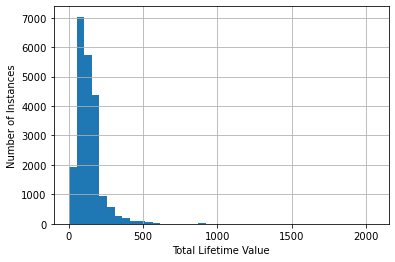

In [67]:
#THIS HISTOGRAM SHOWS THE DISTRIBUTION OF THE CUSTOMER'S LIFETIME VALUE
df['total_sales'].hist(bins = 40)
plt.xlabel('Total Lifetime Value')
plt.ylabel('Number of Instances')

<AxesSubplot:xlabel='returning_sales', ylabel='first_sales'>

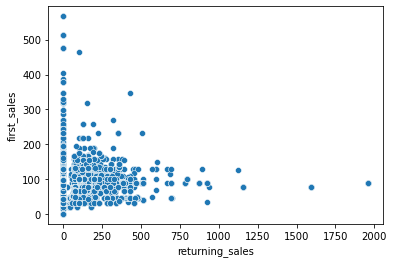

In [68]:
sns.scatterplot(data = df, x = 'returning_sales', y = 'first_sales')

Text(0.5, 1.0, 'Distribution of How Much People Spend Based on the First Product Ordered')

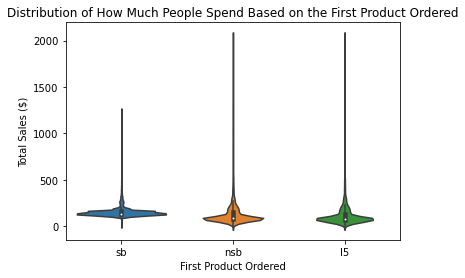

In [69]:
ax = sns.violinplot(x='type', y='total_sales', data = df)
ax.set_xlabel('First Product Ordered')
ax.set_ylabel('Total Sales ($)')
ax.set_title('Distribution of How Much People Spend Based on the First Product Ordered')

As we can see, the data is so left skewed that none of these plots hold a lot of value. We will have to take this data over to a train/test split in the next step: preprocessing and training.

In [70]:
datapath = 'C:/Users/Anthony/Springboard/CapstoneTwo/DataCSV'
save_file(fo_sbn, 'fo_sbn.csv', datapath)

Writing file.  "C:/Users/Anthony/Springboard/CapstoneTwo/DataCSV\fo_sbn.csv"


In [71]:
datapath = 'C:/Users/Anthony/Springboard/CapstoneTwo/DataCSV'
save_file(df, 'df.csv', datapath)

Writing file.  "C:/Users/Anthony/Springboard/CapstoneTwo/DataCSV\df.csv"


During my exploratory data analysis, I learned a lot about the shape and the size of the data that I'm working with. While trying to figure out how to create a larger customer lifetime value, I realized how many people will order one item and be totally done. This causes all of the data to be super right skewed and makes the mean very unreliable. During the next step, I will be training and testing my data to see, over time, which initially bought product will create the most lifetime value for each person.